In [172]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# Step 1: Download historical data for Bitcoin and 10-Year Treasury Futures (ZN)
# bitcoin_ticker = "BTC-USD"
# zn_ticker = "^TNX"


# bitcoin_data = yf.download(bitcoin_ticker, start = start_date, end = end_date)
# zn_data = yf.download(zn_ticker, start = start_date, end = end_date)

In [174]:
# pip install alpha_vantage

In [175]:
start_date = "2020-01-01"
end_date = "2025-01-01"

# use Alpha Vantage instead, given that I have exhausted my Yahoo Finance free quota
from alpha_vantage.cryptocurrencies import CryptoCurrencies
alpha_vantage_api_key = "W7V350CGBK5UQC3I"
btc_api = CryptoCurrencies(key=alpha_vantage_api_key, output_format='pandas')

# Get Bitcoin data
btc_data, meta_data = btc_api.get_digital_currency_daily(symbol='BTC', market='USD')
btc_data.index = pd.to_datetime(btc_data.index)

# Filter the data by the start and end date
btc_data_filtered = btc_data[(btc_data.index >= start_date) & (btc_data.index <= end_date)]

# Display the filtered data
btc_data_filtered

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-01-01,93347.59,94960.91,92743.63,94383.59,6871.738482
2024-12-31,92620.70,96148.94,91887.13,93354.22,10348.632566
2024-12-30,93563.35,94910.48,91271.19,92620.71,15271.244327
2024-12-29,95125.59,95170.06,92841.48,93563.35,3417.527511
2024-12-28,94171.70,95534.17,94002.72,95130.82,2722.659136
...,...,...,...,...,...
2024-03-26,69895.60,71582.96,69269.69,69992.40,15697.734409
2024-03-25,67212.69,71269.92,66381.84,69890.28,22228.138033
2024-03-24,63998.87,67637.60,63785.57,67204.93,6535.827651


In [176]:
btc_data['4. close'].head()

date
2025-03-06    90387.34
2025-03-05    90603.73
2025-03-04    87249.96
2025-03-03    86161.10
2025-03-02    94265.48
Name: 4. close, dtype: float64

In [177]:
btc_data = btc_data.rename(columns= {"4. close": "Close"})
btc_data.head()

,1. open,2. high,3. low,Close,5. volume
date,,,,,
2025-03-06,90607.73,90828.00,89972.74,90387.34,609.261353
2025-03-05,87247.93,91000.00,86329.22,90603.73,14900.933966
2025-03-04,86161.09,88977.27,81444.00,87249.96,23130.370987
2025-03-03,94265.47,94415.61,85007.01,86161.10,22691.670686
2025-03-02,86018.82,95128.88,85003.35,94265.48,16751.229730


In [178]:
btc_data = btc_data.iloc[::-1]
btc_data

,1. open,2. high,3. low,Close,5. volume
date,,,,,
2024-03-22,65478.98,66651.10,62258.36,63814.56,17807.659302
2024-03-23,63814.56,66029.09,63013.19,63998.86,7395.082704
2024-03-24,63998.87,67637.60,63785.57,67204.93,6535.827651
2024-03-25,67212.69,71269.92,66381.84,69890.28,22228.138033
2024-03-26,69895.60,71582.96,69269.69,69992.40,15697.734409
...,...,...,...,...,...
2025-03-02,86018.82,95128.88,85003.35,94265.48,16751.229730
2025-03-03,94265.47,94415.61,85007.01,86161.10,22691.670686
2025-03-04,86161.09,88977.27,81444.00,87249.96,23130.370987


In [179]:
# Step 2: Calculate the 20-day moving average for Bitcoin
btc_data['20DMA'] = btc_data['Close'].rolling(window=20).mean()
btc_data

,1. open,2. high,3. low,Close,5. volume,20DMA
date,,,,,,
2024-03-22,65478.98,66651.10,62258.36,63814.56,17807.659302,NaN
2024-03-23,63814.56,66029.09,63013.19,63998.86,7395.082704,NaN
2024-03-24,63998.87,67637.60,63785.57,67204.93,6535.827651,NaN
2024-03-25,67212.69,71269.92,66381.84,69890.28,22228.138033,NaN
2024-03-26,69895.60,71582.96,69269.69,69992.40,15697.734409,NaN
...,...,...,...,...,...,...
2025-03-02,86018.82,95128.88,85003.35,94265.48,16751.229730,93513.7405
2025-03-03,94265.47,94415.61,85007.01,86161.10,22691.670686,93033.0915
2025-03-04,86161.09,88977.27,81444.00,87249.96,23130.370987,92502.4630


In [180]:
# pip install fredapi

In [181]:
# pip install quandl

In [182]:
# import quandl

In [183]:
# quandl_api_key = "hZmVpojhsy27-xzzjxQN"
# zn_data = quandl.get('FRED/GDP', start_date='2020-01-01', end_date='2025-01-01')

In [184]:
# zn_data.head()

In [185]:
# Step 3: Define the Rebalancing Logic
# Create an initial column for the index value
initial_value = 100
btc_data['Index_Value'] = initial_value
btc_data

,1. open,2. high,3. low,Close,5. volume,20DMA,Index_Value
date,,,,,,,
2024-03-22,65478.98,66651.10,62258.36,63814.56,17807.659302,NaN,100
2024-03-23,63814.56,66029.09,63013.19,63998.86,7395.082704,NaN,100
2024-03-24,63998.87,67637.60,63785.57,67204.93,6535.827651,NaN,100
2024-03-25,67212.69,71269.92,66381.84,69890.28,22228.138033,NaN,100
2024-03-26,69895.60,71582.96,69269.69,69992.40,15697.734409,NaN,100
...,...,...,...,...,...,...,...
2025-03-02,86018.82,95128.88,85003.35,94265.48,16751.229730,93513.7405,100
2025-03-03,94265.47,94415.61,85007.01,86161.10,22691.670686,93033.0915,100
2025-03-04,86161.09,88977.27,81444.00,87249.96,23130.370987,92502.4630,100


In [186]:
# Step 4: Construct the rebalancing logic
btc_data['position'] = 0  # 0 means no position, 1 means fully invested in BTC, 2 means fully in Treasury Futures
btc_data = btc_data.dropna()
treasury_return = 0.042
btc_data.head()

,1. open,2. high,3. low,Close,5. volume,20DMA,Index_Value,position
date,,,,,,,,
2024-04-10,69115.79,71159.60,67463.07,70634.04,16655.987797,68655.8560,100,0
2024-04-11,70638.40,71305.86,69530.00,70020.73,11001.164481,68966.1645,100,0
2024-04-12,70020.71,71265.74,65110.31,67148.61,23509.755542,69123.6520,100,0
2024-04-13,67148.62,69100.00,60822.01,64024.77,27548.472406,68964.6440,100,0
2024-04-14,64021.36,65890.91,62150.00,65777.05,21604.051478,68758.9825,100,0


In [187]:
btc_data['Index_Value'] = 100
btc_data

/var/folders/5g/5qbm4lvx3gn6qk4l0r09x8ph0000gn/T/ipykernel_27901/1982239586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data['Index_Value'] = 100


,1. open,2. high,3. low,Close,5. volume,20DMA,Index_Value,position
date,,,,,,,,
2024-04-10,69115.79,71159.60,67463.07,70634.04,16655.987797,68655.8560,100,0
2024-04-11,70638.40,71305.86,69530.00,70020.73,11001.164481,68966.1645,100,0
2024-04-12,70020.71,71265.74,65110.31,67148.61,23509.755542,69123.6520,100,0
2024-04-13,67148.62,69100.00,60822.01,64024.77,27548.472406,68964.6440,100,0
2024-04-14,64021.36,65890.91,62150.00,65777.05,21604.051478,68758.9825,100,0
...,...,...,...,...,...,...,...,...
2025-03-02,86018.82,95128.88,85003.35,94265.48,16751.229730,93513.7405,100,0
2025-03-03,94265.47,94415.61,85007.01,86161.10,22691.670686,93033.0915,100,0
2025-03-04,86161.09,88977.27,81444.00,87249.96,23130.370987,92502.4630,100,0


In [188]:
btc_data['Index_Value'] = 100  # Starting value of the index (adjust as needed)

# Iterate through the data
for i in range(1, len(btc_data)):
    date = btc_data.index[i]
    prev_date = btc_data.index[i-1]
    if btc_data.iloc[i]['Close'] > btc_data_copy.iloc[i]['20DMA']:
        btc_data.loc[date, 'position'] = 1 # Stay in Bitcoin when price > 20DMA
    else:
        btc_data.loc[date, 'position'] = 2 # Switch to Treasury when price <= 20DMA
        
    # Set the value of 'Index_Value' based on position
    # Update based on previous value
    if btc_data.loc[date, 'position'] == 1:
        btc_data.loc[date, 'Index_Value'] = btc_data.loc[prev_date, 'Index_Value'] * btc_data.loc[date, 'Close'] / btc_data.loc[prev_date, 'Close'] 
    else:
        btc_data.loc[date, 'Index_Value'] = btc_data.loc[prev_date, 'Index_Value'] * (1+ treasury_return/365)

    # Optional: Print the position and the calculated value for debugging
    # print(position, btc_data.loc[btc_data.index[i-1], 'Index_Value'] * 1.1)

# Show the modified DataFrame
print(btc_data[['Close', '20DMA', 'Index_Value']].head())  # Show relevant columns for verification

/var/folders/5g/5qbm4lvx3gn6qk4l0r09x8ph0000gn/T/ipykernel_27901/2261506328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data['Index_Value'] = 100  # Starting value of the index (adjust as needed)
/var/folders/5g/5qbm4lvx3gn6qk4l0r09x8ph0000gn/T/ipykernel_27901/2261506328.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.01150684931508' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  btc_data.loc[date, 'Index_Value'] = btc_data.loc[prev_date, 'Index_Value'] * (1+ treasury_return/365)


               Close       20DMA  Index_Value
date                                         
2024-04-10  70634.04  68655.8560   100.000000
2024-04-11  70020.73  68966.1645   100.011507
2024-04-12  67148.61  69123.6520   100.023015
2024-04-13  64024.77  68964.6440   100.034525
2024-04-14  65777.05  68758.9825   100.046035


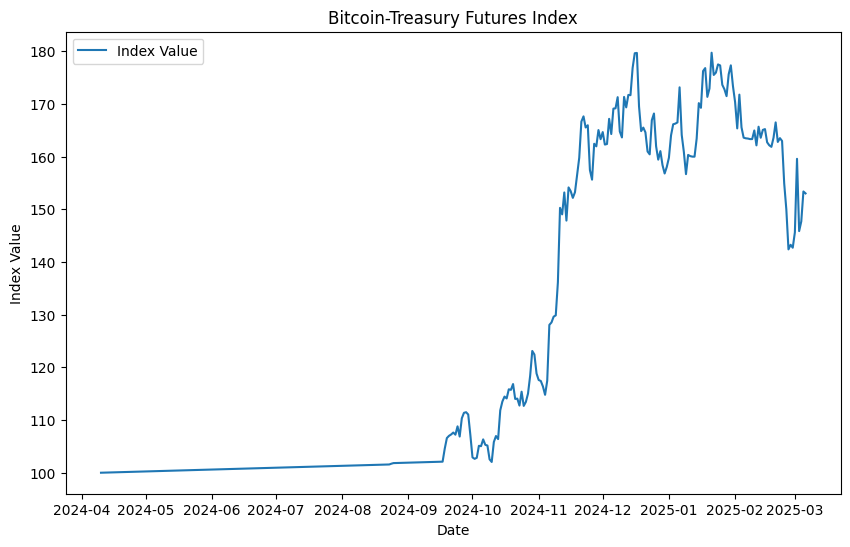

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Index_Value'], label='Index Value')
plt.title('Bitcoin-Treasury Futures Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()